In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm
from scipy.stats import linregress
from matplotlib.lines import Line2D

# 疏散星团上的测试

## 1. 分析多个星表在NGC_2168星团上的化学一致性

In [2]:
SpecTE_NGC_2168_catalog = pd.read_csv("./match_result_Jingzhong/Our_And_NGC_2168.csv")    
StarGRU_NGC_2168_catalog = pd.read_csv("./match_result_Jingzhong/StarGRU_And_NGC_2168.csv")       
RRNet_NGC_2168_catalog = pd.read_csv("./match_result_Jingzhong/RRNet_And_NGC_2168.csv")
ASPCAP_NGC_2168_catalog = pd.read_csv("./match_result_Jingzhong/ASPCAP_And_NGC_2168.csv")    # xsc

In [3]:

ASPCAP_NGC_2168_catalog.columns


Index(['obsid', 'LAMOST', 'RAdeg', 'DEdeg', 'snrg', 'snrr', 'snri', 'RV1d',
       'Teff', 'logg', '[Fe/H]', 'GaiaDR2', 'plx', 'e_plx', 'pmRA*', 'e_pmRA*',
       'pmDE', 'e_pmDE', 'Gmag', 'BP-RP', 'proba', 'Cluster', 'ASPCAP_starid',
       'ASPCAP_RA', 'ASPCAP_Dec', 'ASPCAP_RV', 'ASPCAP_Teff[K]', 'ASPCAP_Logg',
       'ASPCAP_FeH', 'ASPCAP_CH', 'ASPCAP_CIH', 'ASPCAP_NH', 'ASPCAP_OH',
       'ASPCAP_NaH', 'ASPCAP_MgH', 'ASPCAP_AlH', 'ASPCAP_SiH', 'ASPCAP_SH',
       'ASPCAP_KH', 'ASPCAP_CaH', 'ASPCAP_TiH', 'ASPCAP_VH', 'ASPCAP_CrH',
       'ASPCAP_MnH', 'ASPCAP_NiH', 'Separation'],
      dtype='object')

In [4]:

ASPCAP_NGC_2168_catalog.columns = [col.replace('ASPCAP_', '') if col.startswith('ASPCAP_') else col for col in ASPCAP_NGC_2168_catalog.columns]

In [5]:
SpecTE_NGC_2168_catalog.shape, StarGRU_NGC_2168_catalog.shape, RRNet_NGC_2168_catalog.shape, ASPCAP_NGC_2168_catalog.shape

((265, 65), (259, 61), (22, 66), (19, 46))

In [6]:
# label_name_list = ['Fe', 'C', 'N', 'O', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Ni']
label_name_list = ['FeH', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH', 'SH', 'KH', 'CaH', 'TiH', 'CrH', 'MnH', 'NiH']

number_of_samples = 70
data_all = [SpecTE_NGC_2168_catalog.sample(n=number_of_samples, replace=True), 
            StarGRU_NGC_2168_catalog.sample(n=number_of_samples, replace=True), 
            RRNet_NGC_2168_catalog.sample(n=number_of_samples, replace=True),
            # ASPCAP_NGC_2168_catalog.sample(n=number_of_samples, replace=True), 
           ]

data_all_all = [SpecTE_NGC_2168_catalog, StarGRU_NGC_2168_catalog, RRNet_NGC_2168_catalog,ASPCAP_NGC_2168_catalog]
star_cluster_name = ['SpecTE', 'StarGRU', 'RRNet','APOGEE']


Teff_all = [df["Teff[K]"] for df in data_all_all]
Teff = [df["Teff[K]"] for df in data_all]
Metallic_element = []
Metallic_element_all = []
Metallic_element_mean = []
Metallic_element_std = []

def get_column_value(df: pd.DataFrame, column_name: str) -> pd.Series:
    """
    从 DataFrame 中提取指定列的值。

    参数:
    df (pd.DataFrame): 要提取列的 DataFrame。
    column_name (str): 要提取的列名。

    返回:
    pd.Series: 提取的列数据。如果列不存在，则返回全为 NaN 的 Series。
    """
    if column_name in df.columns:
        return df[column_name]
    else:
        print(f"警告: 列 '{column_name}' 在 DataFrame 中不存在。返回全 NaN 的 Series。")
        return pd.Series([np.nan] * len(df), index=df.index)
    

for ele in label_name_list:

    Metallic_element.append([get_column_value(df, ele) for df in data_all]) 
    Metallic_element_all.append([get_column_value(df, ele) for df in data_all_all])
    Metallic_element_mean.append([get_column_value(df, ele).mean() for df in data_all])
    Metallic_element_std.append([get_column_value(df, ele).std() for df in data_all])

len(Metallic_element[0]), len(Teff)

(3, 3)

In [71]:
SpecTAE_Metallic_element_std = []
for index in range(len(data_all_all)):
    SpecTAE_Metallic_element_std.append([data_all_all[index][ele].std() for ele in label_name_list])

    
for index in range(len(SpecTAE_Metallic_element_std)):
    max_value = max(SpecTAE_Metallic_element_std[index])
    min_value = min(SpecTAE_Metallic_element_std[index])
    average_value = sum(SpecTAE_Metallic_element_std[index]) / len(SpecTAE_Metallic_element_std[index])
    
    gap = (max_value - min_value) / 2
    # print("最大值:", max_value)
    # print("最小值:", min_value)
    # print("平均值:", average_value, "\n")

    print(f'在 {star_cluster_name[index]} 中的整体化学均匀性为：{average_value:.3f} ± {gap:.3f}dex')

在 SpecTE 中的整体化学均匀性为：0.190 ± 0.079dex
在 StarGRU 中的整体化学均匀性为：0.207 ± 0.090dex
在 RRNet 中的整体化学均匀性为：0.177 ± 0.050dex
在 APOGEE 中的整体化学均匀性为：0.165 ± 0.168dex


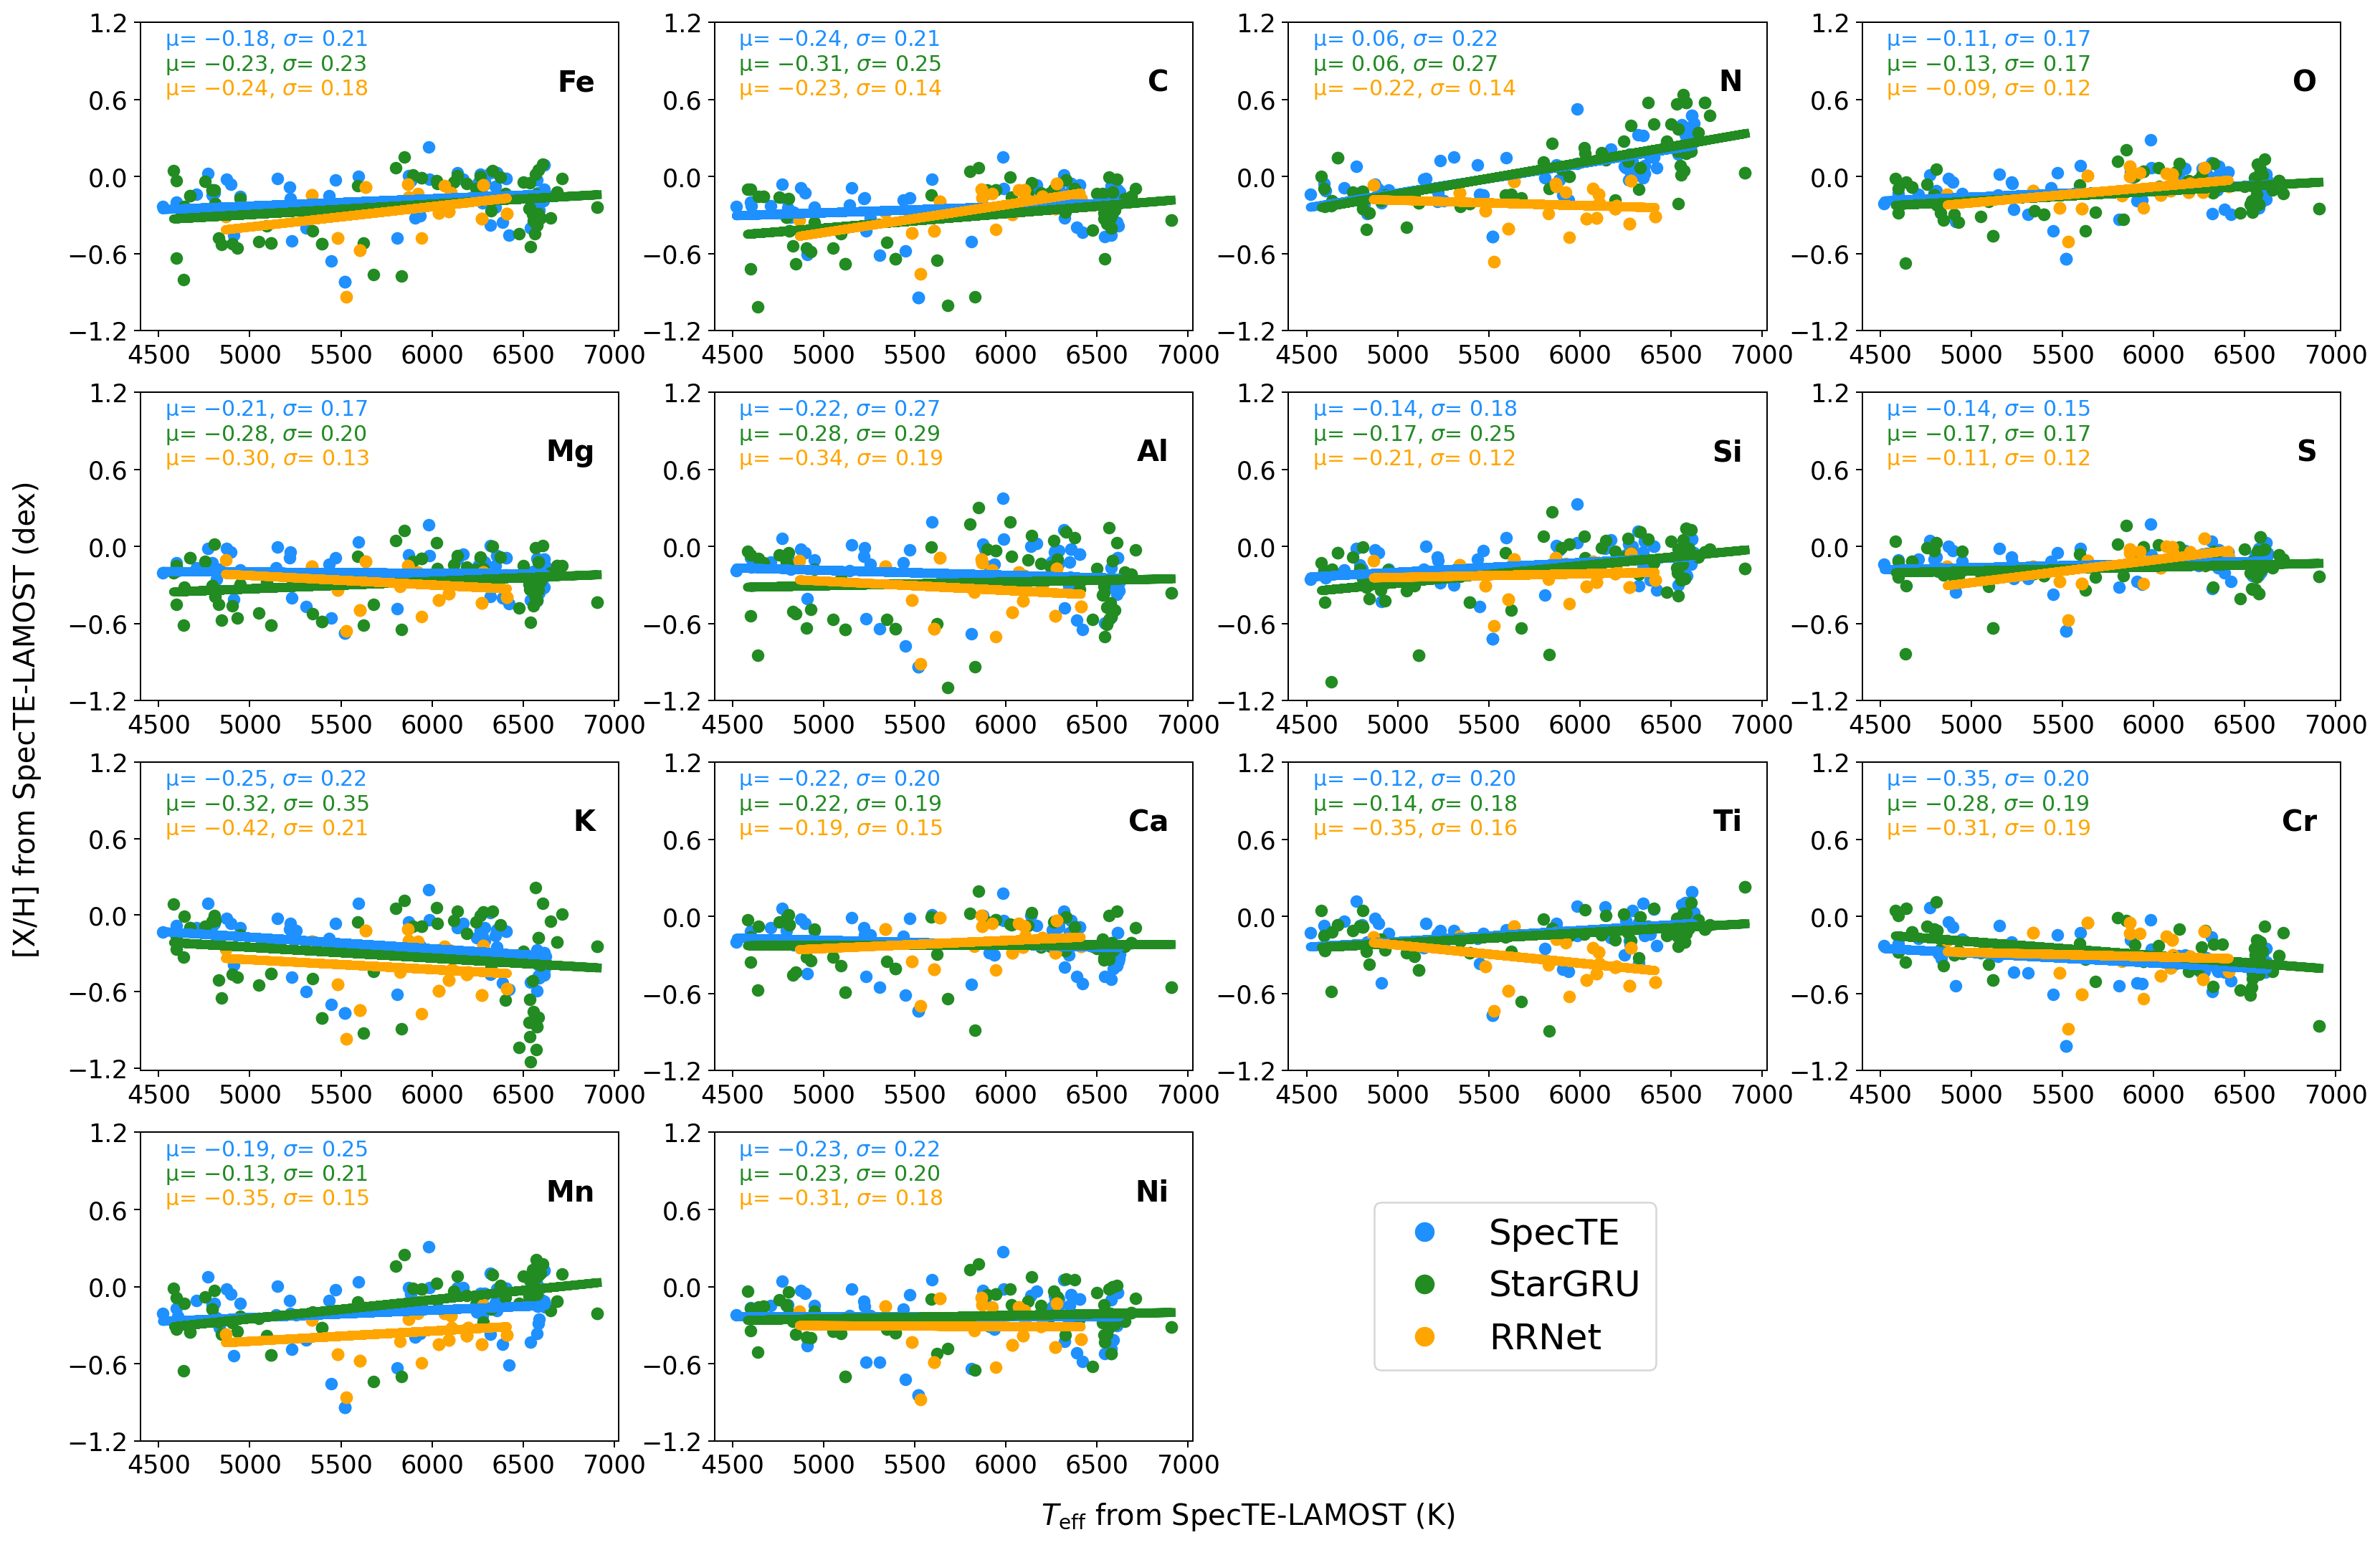

In [7]:
fig = plt.figure(figsize=(22,18),dpi=180)

colors= ['dodgerblue', 'forestgreen', 'orange', 'violet']

for i in range(len(label_name_list)):
    ax = plt.subplot(5,4,i+1)
    
    for j in range(len(Teff)):
        # if j == 2 or j == 0:
            plt.scatter(Teff[j], Metallic_element[i][j], color=colors[j])
            # 计算线性回归
            # slope, intercept, r_value, p_value, std_err = linregress(Teff_all[j], Metallic_element_all[i][j])
            slope, intercept, r_value, p_value, std_err = linregress(Teff[j], Metallic_element[i][j])
            # 绘制回归线
            plt.plot(Teff[j], intercept + slope*Teff[j], linewidth=5, color=colors[j])

            plt.text(0.05, 0.98 - j * 0.08, 
                    f"μ= {Metallic_element_mean[i][j]:.{2}f}, $\sigma$= {Metallic_element_std[i][j]:.{2}f}".replace('-', '\u2212'), 
                    transform=ax.transAxes, fontsize=12, ha='left', va='top', color=colors[j])

    plt.xticks(size=14)
    plt.yticks(np.arange(-1.2, 1.25, 0.6), size=14)
    plt.text(0.95, 0.85, label_name_list[i].split('H')[0], transform=ax.transAxes,
            fontsize=16, ha='right', va='top', color='black', fontweight='bold')


# 添加图例，并控制其位置和大小
# 自定义图例
custom_lines = [Line2D([0], [0], color=colors[0], marker='o', markersize=10, linestyle=''),
                Line2D([0], [0], color=colors[1], marker='o', markersize=10, linestyle=''),
                Line2D([0], [0], color=colors[2], marker='o', markersize=10, linestyle='')]
fig.legend(custom_lines, star_cluster_name, loc='lower right', fontsize=20, bbox_to_anchor=(0.665, 0.292))

fig.supxlabel(r"$T_\mathrm{eff}$ from SpecTE-LAMOST (K)", size=16, position=(0.515, 0.23, 1))
fig.supylabel("[X/H] from SpecTE-LAMOST (dex)", size=16, position=(0.08, 0.58, 1))

plt.savefig('./images/Open_Clusters_teff_NGC_2168.png', bbox_inches='tight')
# plt.savefig('../images/Open_Clusters_teff_test.png', bbox_inches='tight')
# plt.tight_layout()
plt.show()


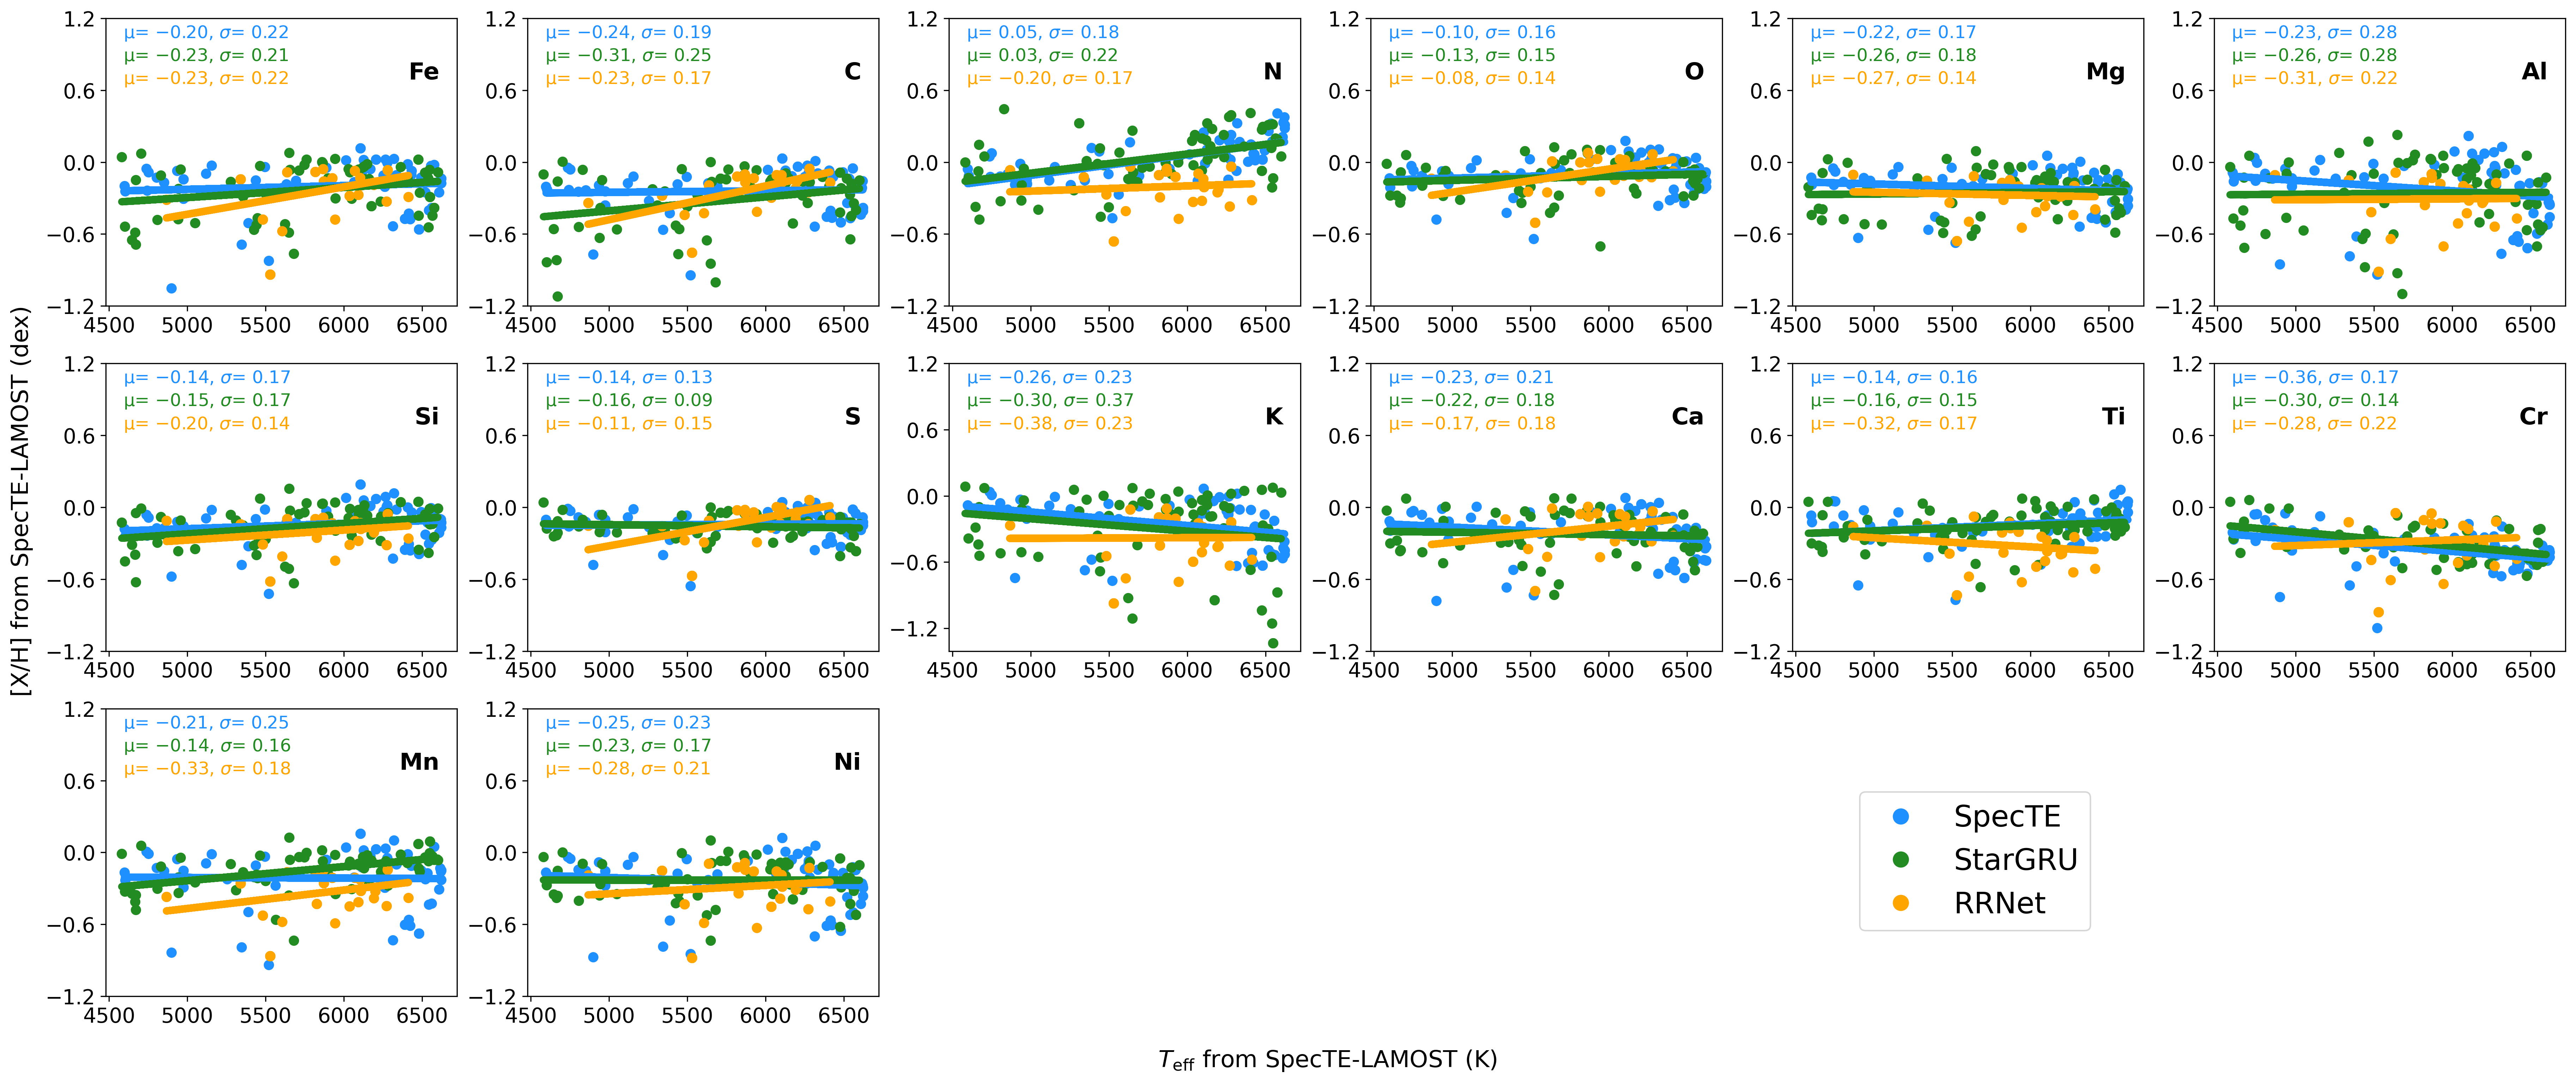

In [68]:
fig = plt.figure(figsize=(30,12),dpi=300)

colors= ['dodgerblue', 'forestgreen', 'orange', 'violet']
colors= ['dodgerblue', 'forestgreen', 'orange', 'violet', 'darkred', 'navy', 'gold']

for i in range(len(label_name_list)):
    ax = plt.subplot(3,6,i+1)
    
    for j in range(len(Teff)):
        # if j == 2 or j == 0:
            plt.scatter(Teff[j], Metallic_element[i][j], color=colors[j])
            # 计算线性回归
            # slope, intercept, r_value, p_value, std_err = linregress(Teff_all[j], Metallic_element_all[i][j])
            slope, intercept, r_value, p_value, std_err = linregress(Teff[j], Metallic_element[i][j])
            # 绘制回归线
            plt.plot(Teff[j], intercept + slope*Teff[j], linewidth=5, color=colors[j])

            plt.text(0.05, 0.98 - j * 0.08, 
                    f"μ= {Metallic_element_mean[i][j]:.{2}f}, $\sigma$= {Metallic_element_std[i][j]:.{2}f}".replace('-', '\u2212'), 
                    transform=ax.transAxes, fontsize=12, ha='left', va='top', color=colors[j])

    plt.xticks(size=14)
    plt.yticks(np.arange(-1.2, 1.25, 0.6), size=14)
    plt.text(0.95, 0.85, label_name_list[i].split('H')[0], transform=ax.transAxes,
            fontsize=16, ha='right', va='top', color='black', fontweight='bold')


# 添加图例，并控制其位置和大小
# 自定义图例
custom_lines = [Line2D([0], [0], color=colors[0], marker='o', markersize=10, linestyle=''),
                Line2D([0], [0], color=colors[1], marker='o', markersize=10, linestyle=''),
                Line2D([0], [0], color=colors[2], marker='o', markersize=10, linestyle='')]
fig.legend(custom_lines, star_cluster_name, loc='lower right', fontsize=20, bbox_to_anchor=(0.755, 0.15))

fig.supxlabel(r"$T_\mathrm{eff}$ from SpecTE-LAMOST (K)", size=16, position=(0.51, 0.05, 1))
fig.supylabel("[X/H] from SpecTE-LAMOST (dex)", size=16, position=(0.095, 0.5, 1))

plt.savefig('./images/Open_Clusters_teff_NGC_2168.png1', bbox_inches='tight')
# plt.savefig('../images/Open_Clusters_teff_test.png', bbox_inches='tight')
# plt.tight_layout()
plt.show()


In [8]:
import pickle
with open("data_all.pkl", "wb") as f:

    pickle.dump(data_all, f)


NameError: name 'pickle' is not defined